# Identification.

Name: Renan Ryu Kajihara

NUSP: 14605762

# Name of the dataset
Dataset: Chicago Crime

# Abstract
O dataset "Chicago Crime" mostra crimes reportados pelo Departamento de Polícia de Chicago nos anos de 2014, 2015 e 2016. Tal dataset possui informações relevantes sobre a localização, gravidade, descrição e data dos crimes reportados, sendo tais dados fundamentais para o estudo do dataset.

# Análise
Será feita uma análise do dataset Chicago Crime por meio de três diferentes métodos de clusterização: DBSCAN, K-Means e Mean-Shift.
A primeira análise será feita a partir dos dados da latitude e longitude do local de ocorrência dos crimes.
Ademais, será feita uma análise entre os distritos e as àreas comunitárias da cidade.
Além disso, será feita uma análise comparativa dos diferentes métodos aplicados.


In [ ]:
import pandas as pd
from statistics import mean, median
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

chi14 = pd.read_csv('https://drive.google.com/uc?export=download&id=189ZRV-iBu_dWQBP-129VxOxFj41KVfh4')
chi15 = pd.read_csv('https://drive.google.com/uc?export=download&id=12AgJtTRDrcUqyxOqsqFXDph18hYNSIwP')
chi16 = pd.read_csv('https://drive.google.com/uc?export=download&id=1xsXwBr4FMSX2v82_ovFVZtdyxUVJBCn7')

chi = pd.concat([chi14,chi15,chi16])


In [ ]:
chi.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude
0,9446824,HX100141,01/01/2014 02:00:00 AM,0000X W ILLINOIS ST,0460,BATTERY,SIMPLE,STREET,False,False,1831,18,42.0,8.0,08B,41.890828,-87.630235
1,9446748,HX100020,01/01/2014 12:00:00 AM,006XX N DEARBORN ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1832,18,42.0,8.0,06,41.893542,-87.629702
2,9446758,HX100030,01/01/2014 12:30:00 AM,052XX W RACE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1523,15,28.0,25.0,14,41.890046,-87.756333
3,9446760,HX100027,01/01/2014 12:30:00 AM,053XX W WELLINGTON AVE,0460,BATTERY,SIMPLE,APARTMENT,True,False,2514,25,31.0,19.0,08B,41.935011,-87.759739
4,9446764,HX100054,01/01/2014 12:10:00 AM,014XX W LEXINGTON ST,0460,BATTERY,SIMPLE,STREET,False,False,1231,12,25.0,28.0,08B,41.872509,-87.663069


#Primeira Análise:

A primeira análise será feita a partir dos dados da latitude e
longitude dos locais em que ocorreram os crimes.

Para que os gráficos fiquem compreensíveis, utilizaremos apenas as primeiras 1000 linhas do dataset. Abaixo, é possível observar o gráfico da latitude pela longitude do local de ocorrência dos crimes das 1000 primeiras linhas do dataset.

Text(0, 0.5, 'Longitude')

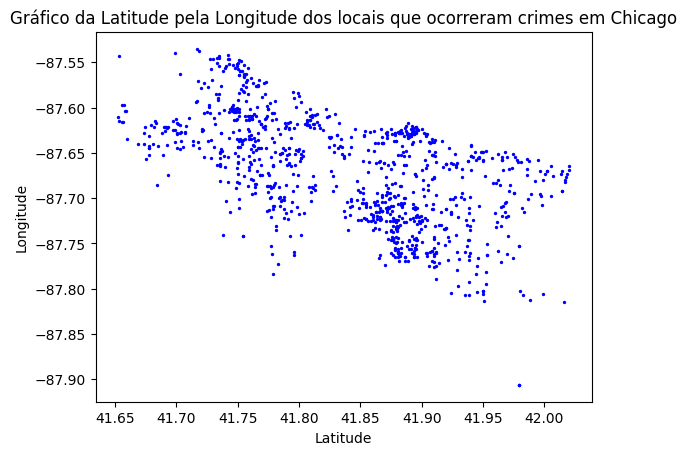

In [ ]:
chi_ajustado=chi[chi['Longitude']>-90] #Nesse dataset, havia apenas um crime com Longitude >-90. Achamos que é apenas um erro de digitação

chi_1000_linhas = chi_ajustado.iloc[:1000] # Pegamos as 1000 primeiras linhas do dataset para o plot ser compreensível

plt.scatter(chi_1000_linhas['Latitude'], chi_1000_linhas['Longitude'],s=2, c='blue' )
plt.title('Gráfico da Latitude pela Longitude dos locais que ocorreram crimes em Chicago')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

#K-Means

Agora, utilizaremos o método K-Means, que utiliza como base a distância dos pontos a partir dos centroides.

É possível observar que, a definição do número de centroides influencia totalmente o resultado do algoritmo K-Means. Dessa forma, ele pode ser muito útil quando os clusters são separados de maneira evidente.

<ipython-input-29-28100bc2629c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_1000_linhas[f'kmeans_{i}']=kmeans.labels_


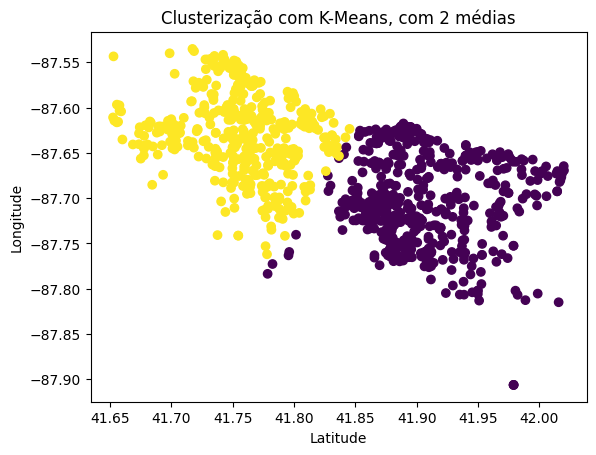

<ipython-input-29-28100bc2629c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_1000_linhas[f'kmeans_{i}']=kmeans.labels_


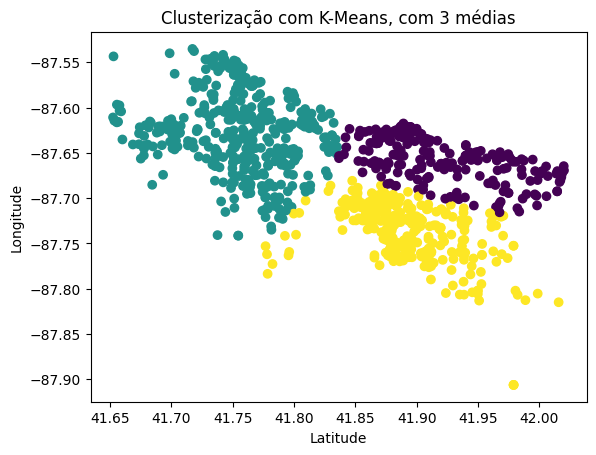

<ipython-input-29-28100bc2629c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_1000_linhas[f'kmeans_{i}']=kmeans.labels_


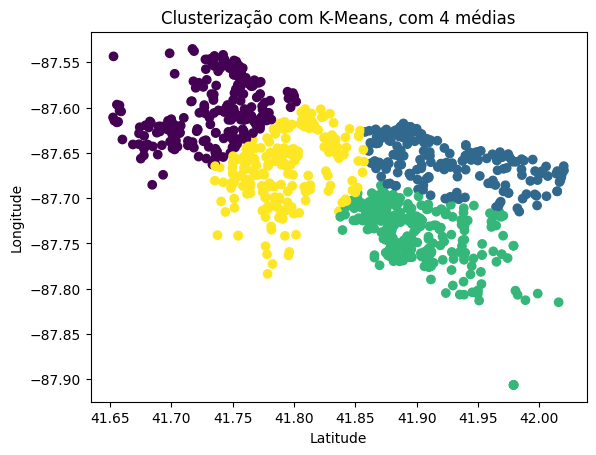

<ipython-input-29-28100bc2629c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_1000_linhas[f'kmeans_{i}']=kmeans.labels_


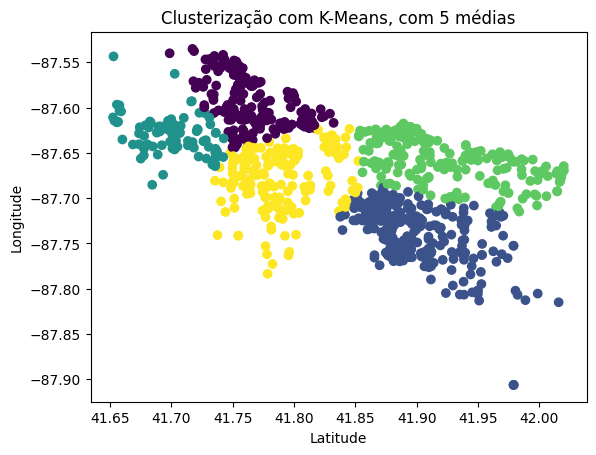

<ipython-input-29-28100bc2629c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_1000_linhas[f'kmeans_{i}']=kmeans.labels_


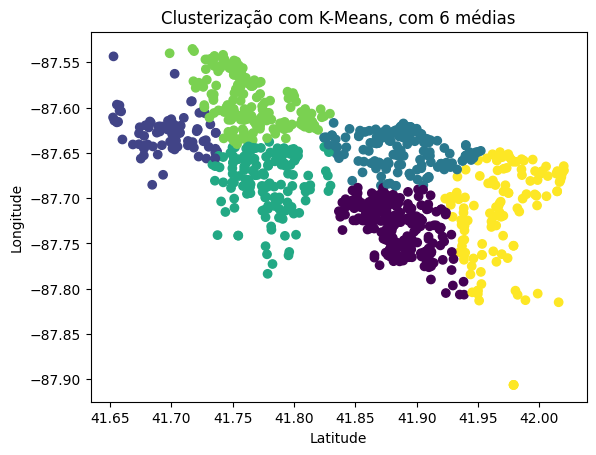

<ipython-input-29-28100bc2629c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_1000_linhas[f'kmeans_{i}']=kmeans.labels_


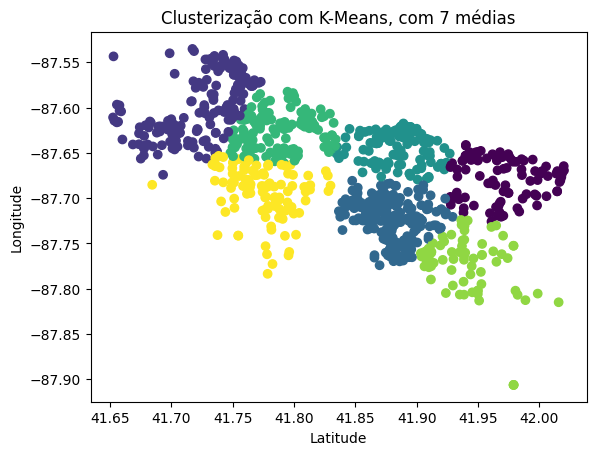

<ipython-input-29-28100bc2629c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_1000_linhas[f'kmeans_{i}']=kmeans.labels_


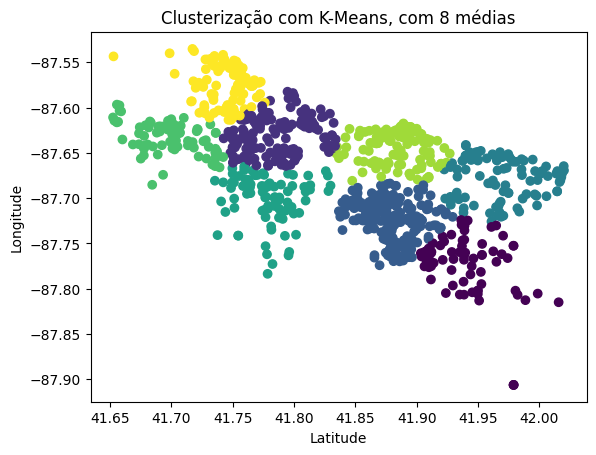

<ipython-input-29-28100bc2629c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_1000_linhas[f'kmeans_{i}']=kmeans.labels_


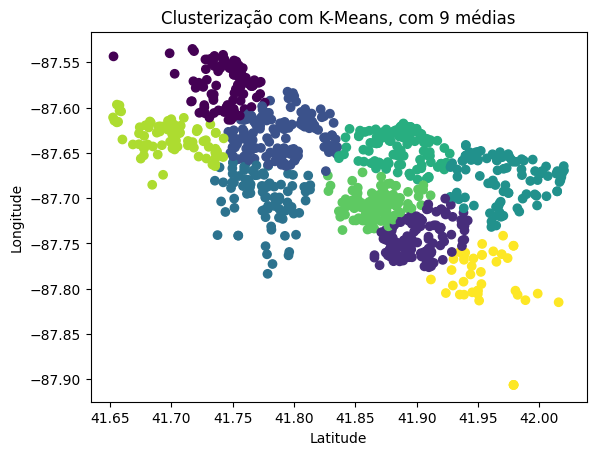

In [ ]:
for i in range (2,10):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(chi_1000_linhas[['Latitude','Longitude']])
  chi_1000_linhas[f'kmeans_{i}']=kmeans.labels_
  plt.scatter(x=chi_1000_linhas['Latitude'], y=chi_1000_linhas['Longitude'], c=chi_1000_linhas[f'kmeans_{i}'])
  plt.title(f'Clusterização com K-Means, com {i} médias')
  plt.xlabel('Latitude')
  plt.ylabel('Longitude')
  plt.show()


#Mean-shift

O algoritmo Mean-Shift, assim como o DBSCAN, utiliza o conceito de densidade espacial para a criação dos clusters.

Pode-se observar que esse método conseguiu fazer uma divisão razoável dos pontos, subdividindo-os em clusters aparentemente corretos.

<ipython-input-30-e42ed7cc6cbd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_1000_linhas['ms']=labels


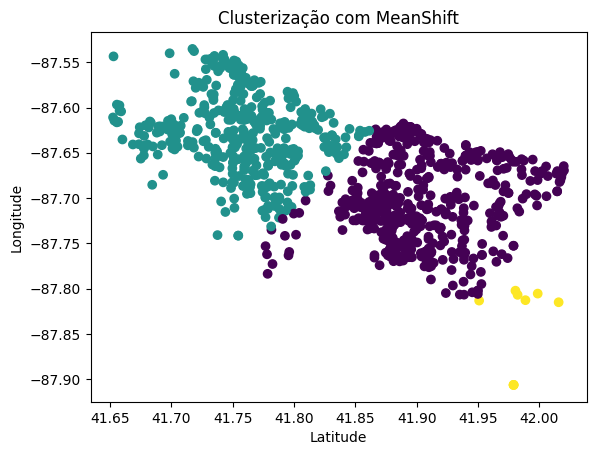

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth((chi_1000_linhas[['Latitude','Longitude']]), quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(chi_1000_linhas[['Latitude','Longitude']])
labels = ms.labels_

chi_1000_linhas['ms']=labels

plt.scatter(x=chi_1000_linhas['Latitude'], y=chi_1000_linhas['Longitude'], c=chi_1000_linhas['ms'])
plt.title(f'Clusterização com MeanShift')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()






#Conclusão referente à primeira análise

É possível observar que, pelos dados não possuirem agrupamentos de pontos bem definidos, a clusterização se torna difícil e não muita esclarecedora. Nesse contexto, é perceptível que não há áreas que são grandes focos dos crimes na cidade de Chicago.

Além disso, é notório que as diferentes técnicas de clusterização geram diferentes gráficos. Dessa forma, fica evidente o fato de que cada método de clusterização possui suas particularidades, sendo úteis para diferentes propósitos e datasets. Nesse sentido, o método K-Means seria muito útil quando há uma definição clara sobre o número de clusters e o método MeanShift pode ser mais útil quando não se sabe o número ideal de clusters.


#Segunda Análise:

Agora analisaremos o gráfico que compara o distrito com a área comunitária em que os crimes foram cometidos.

Novamente, para os gráficos ficarem mais claros, utilizaremos as primeiras 1000 linhas do dataset.

Abaixo, é possível observar o gráfico do distrito pela área comunitária:


Text(0, 0.5, 'Área Comunitária')

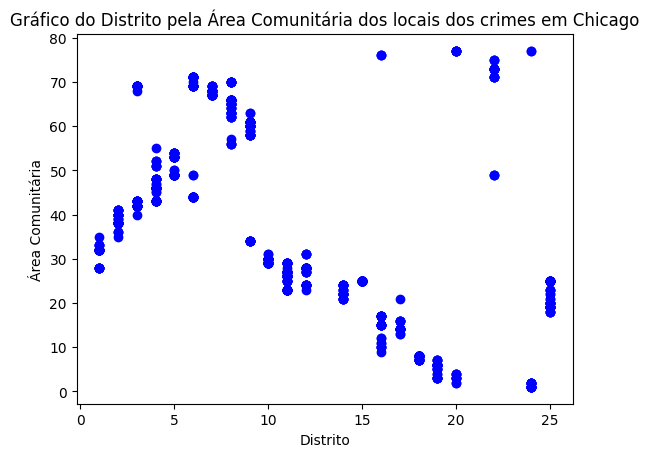

In [ ]:
plt.scatter(chi_1000_linhas['District'], chi_1000_linhas['Community Area'], c='blue')
plt.title('Gráfico do Distrito pela Área Comunitária dos locais dos crimes em Chicago')
plt.xlabel('Distrito')
plt.ylabel('Área Comunitária')

#DBSCAN

O método de clusterização que vamos utilizar para esta análise é o DBSCAN, que utiliza como base a definição de densidade espacial.



<ipython-input-32-36a12ce6e416>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_1000_linhas['dbscan1']=labels


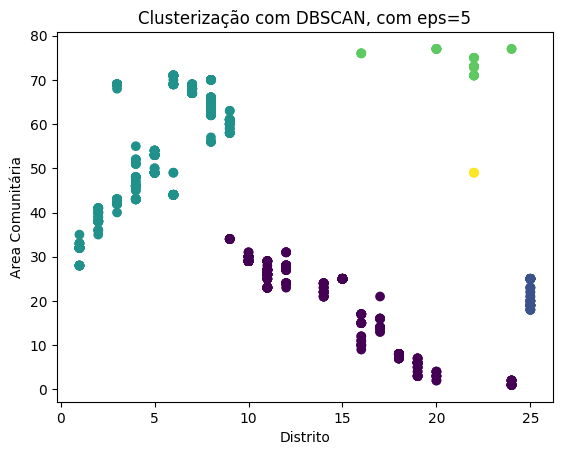

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=3)
labels=dbscan.fit_predict(chi_1000_linhas[['District','Community Area']])
np.unique(labels)


chi_1000_linhas['dbscan1']=labels

plt.scatter(x=chi_1000_linhas['District'], y=chi_1000_linhas['Community Area'], c=chi_1000_linhas['dbscan1'])
plt.title(f'Clusterização com DBSCAN, com eps=5')
plt.xlabel('Distrito')
plt.ylabel('Area Comunitária')
plt.show()

#Conclusão refente à análise 2:

É possível observar que, nesta segunda análise, há agrupamentos mais bem definidos que contribuem para uma análise mais clara por meio da clusterização.
Nesse sentido, é possível observar que há 5 grupos bem definidos, que foram identificados claramente pelo método DBSCAN. Assim, é possível concluir que há pares distrito, área comunitária em que há mais crimes comparados à outros pares.

Além disso, ao realizar a clusterização, percebeu-se que o valor de eps no método DBSCAN faz total diferença no resultado final do gráfico gerado, uma vez que tal variável define a distância máxima em torno de um ponto para considerar os pontos à sua volta como seus vizinhos.
